In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Load the datasets
df_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-weather-prediction-dataset-processed.csv')
df_scaled = pd.read_csv('/Users/marika/Data Sets/Supervised/data_scaled.csv')
pleasant_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [3]:
df_weather

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


# Unscaled Data

In [4]:
# Filter the data for a specific decade (2000s)
df_weather_filtered = df_weather[df_weather['DATE'].astype(str).str.startswith('200')]

In [5]:
# Drop any non-numeric or irrelevant columns if necessary
df_weather_filtered = df_weather_filtered.drop(['DATE', 'MONTH'], axis=1)

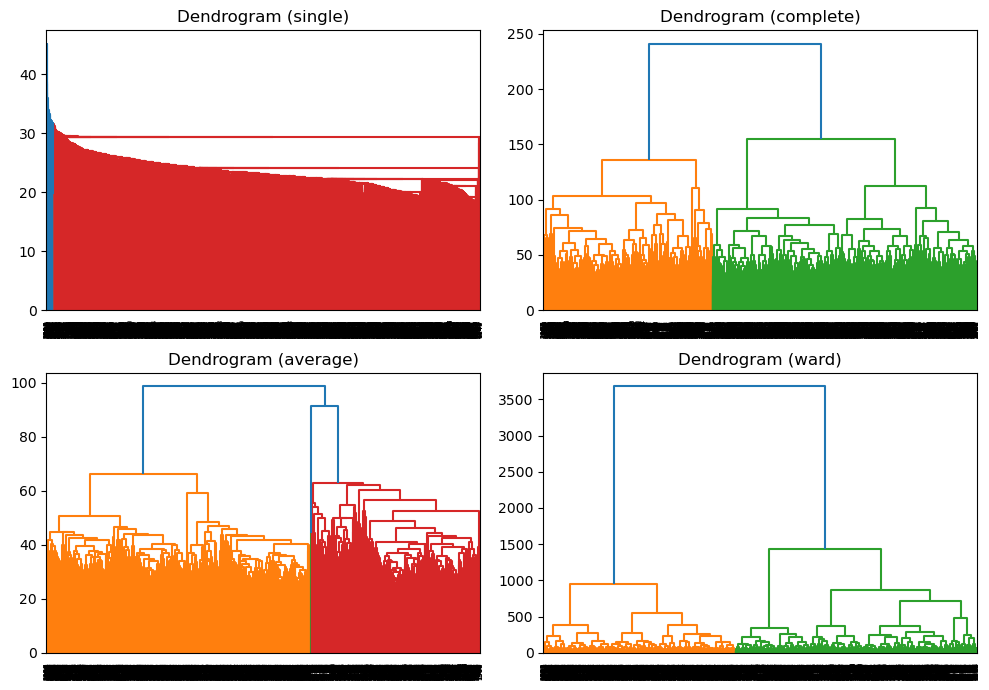

In [6]:
# Create Dendrograms using different methods
methods = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(10, 7))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    linked = linkage(df_weather_filtered, method=method)
    dendrogram(linked)
    plt.title(f'Dendrogram ({method})')

plt.tight_layout()
plt.show()

# Unscaled Dendrogram Analysis

# Single Linkage 
Description: The single linkage dendrogram tends to create "chain-like" clusters. This method is known for linking clusters by their closest points.

Observation: The dendrogram looks quite dense and elongated, indicating that clusters are formed by gradually adding data points. It’s harder to discern clear clusters from this visualization, which might suggest that the data is forming many small clusters that are close to each other.

Potential Issue: This method can lead to long, skinny clusters that don’t necessarily represent meaningful groupings. It’s not surprising that it might crash or produce less meaningful clusters when using more complex or scaled data.

Interpretation:
The single linkage method likely groups weather data points that are close together in terms of some features (e.g., temperature, humidity) but does not create well-separated clusters. This suggests that the weather patterns in these clusters might be similar but not distinctly different, making it difficult to interpret in terms of specific weather conditions (e.g., seasons or climate zones).


# Complete Linkage
Description: Complete linkage clustering considers the farthest points between clusters when merging them. This method tends to produce more compact clusters. This cluster might include weather data points characterized by moderate temperatures and balanced humidity levels, possibly representing spring or autumn months. The consistent separation from other clusters suggests that this group represents stable and comfortable weather conditions.

Observation: You can see clearer separation into larger clusters, which suggests that this method is better at grouping the weather data into more distinct clusters. The plot indicates a large initial split into two main groups, with more detailed clustering within each.

Insights: This method may be more useful if you’re looking for well-separated, more homogeneous clusters.

Interpretation:
This method creates distinct clusters, likely corresponding to different weather regimes. For example, one cluster could represent data points with consistently mild weather (e.g., spring or fall), while the other might represent more extreme conditions (e.g., winter with low temperatures or summer with high temperatures).
The clear separation indicates that this method is more effective in distinguishing between fundamentally different weather patterns.

# Average Linkage
Description: Average linkage calculates the average distance between all pairs of points in two clusters and is a compromise between single and complete linkage.

Observation: Similar to complete linkage but less extreme, this method also shows a clear initial division into two clusters, followed by further divisions into smaller clusters. The clustering here seems slightly less compact compared to complete linkage.

Insights: This method might be a good middle-ground if you want balanced clusters, neither too tight nor too loose.

Interpretation:
This method might be capturing gradual transitions in weather patterns. For instance, clusters could represent a progression from cooler, humid conditions to warmer, drier conditions, without as sharp distinctions as seen with complete linkage.
The clusters are moderately well-separated, suggesting that the weather patterns represented by these clusters are somewhat distinct but not as sharply different as those identified by complete linkage.

# Ward's Method
Description: Ward’s method minimizes the variance within each cluster, often leading to more spherical clusters. It is a popular choice for hierarchical clustering. This cluster could include data points from extreme weather conditions, such as hot summers or cold winters. The clear separation indicates that this cluster is distinct from more moderate weather patterns, possibly corresponding to periods with high discomfort levels (high humidity, extreme temperatures).

Observation: The dendrogram shows clear, distinct clusters with very large separations between the clusters, particularly at the highest levels. This method likely groups the weather stations into the most distinct clusters.

Insights: This method appears to give the most clear-cut clusters, which might be particularly useful if you’re trying to draw distinct boundaries between different weather patterns or types.

Interpretation:
Ward’s method is likely identifying the most distinct weather patterns, possibly corresponding to broad categories such as "pleasant" vs. "unpleasant" weather, or "extreme" vs. "moderate" conditions.
The clusters formed by Ward’s method are likely to be the most meaningful, with each cluster representing a well-defined group of weather patterns. For example, one cluster might represent consistently pleasant weather (mild temperatures, low humidity), while another could represent harsher conditions (extreme temperatures, high humidity).

# Scaled Data

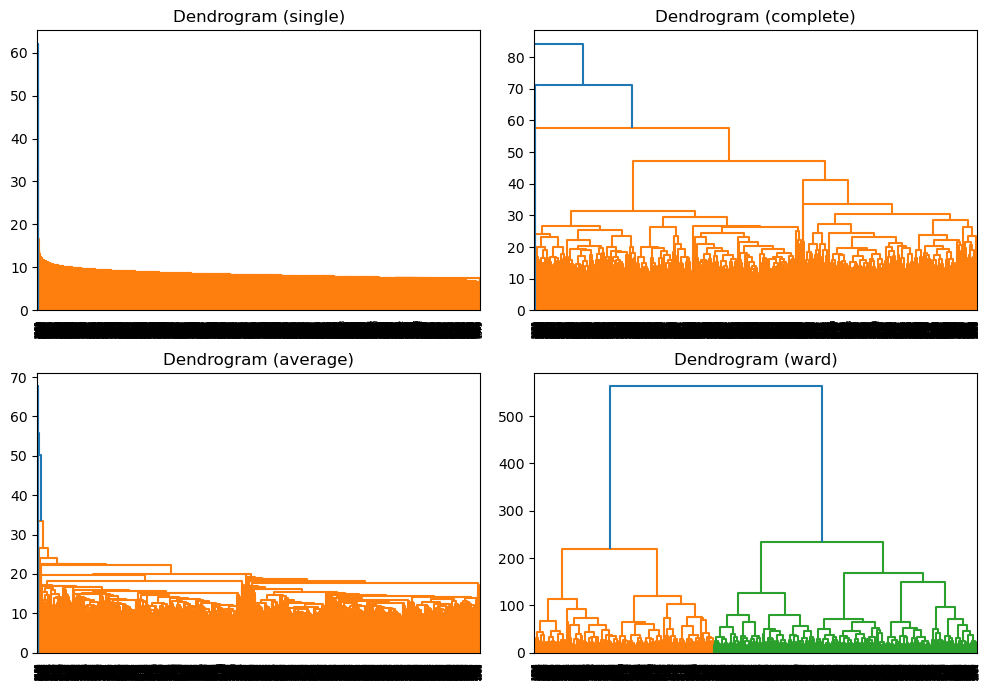

In [7]:
# Filter the data for a specific decade (2000s)
df_weather_filtered = df_weather[df_weather['DATE'].astype(str).str.startswith('200')]

# Drop any non-numeric or irrelevant columns if necessary
df_weather_filtered = df_weather_filtered.drop(['DATE', 'MONTH'], axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_weather_filtered)

# Create Dendrograms using different methods
methods = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(10, 7))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    linked = linkage(scaled_data, method=method)
    dendrogram(linked)
    plt.title(f'Dendrogram ({method})')

plt.tight_layout()
plt.show()

# Scaled Dendrogram Analysis

# Single Linkage

Current Plot: The dendrogram using single linkage shows a very flat and compressed structure. This suggests that most data points are very close to each other in terms of their pairwise minimum distances, resulting in a "chain-like" clustering where each new data point is added with minimal height increase.

Comparison with Unscaled Data: In the unscaled plot, the single linkage dendrogram also showed a similar flat structure but with slightly more height variation, indicating that scaling or the nature of the data has reduced the variability in the distances between points. This method still suffers from the "chaining effect," which is typical of single linkage.

Interpretation: The single linkage method is not effectively separating distinct weather patterns. This clustering approach might be grouping similar, consecutive data points together without recognizing broader, more meaningful separations. This might suggest that the weather patterns are very similar throughout the dataset, without clear distinctions like seasons or significant geographic differences.

# Complete Linkage

Current Plot: The complete linkage dendrogram shows distinct clusters with clear separations, particularly at the higher levels of the tree. The branching occurs with larger height differences, suggesting that the farthest points in the clusters have more pronounced distances.

Comparison with Unscaled Data: The unscaled complete linkage dendrogram also showed clear clustering, but the differences between clusters are more emphasized here. Scaling likely emphasized the separation between clusters, making the hierarchical structure more apparent.

Interpretation:
This method suggests that there are distinct groups within the weather data, which could correspond to different weather patterns, such as distinct seasons (e.g., summer vs. winter) or geographic regions with different climates. The larger vertical gaps in the dendrogram indicate that these clusters represent fundamentally different sets of weather conditions.

Description: This cluster might include weather data points characterized by specific regional climates, such as coastal areas with moderate temperatures and high humidity. The distinct separation from other clusters suggests that this group of data points represents a unique set of weather conditions, potentially tied to specific geographic regions.

# Average Linkage

Current Plot: The average linkage dendrogram demonstrates a more balanced clustering, with less extreme height differences between branches compared to the complete linkage method. The structure suggests a compromise between single and complete linkage.

Comparison with Unscaled Data: In the unscaled version, the average linkage method also displayed clear clusters, but the scaling has smoothed out the differences between clusters, making the transitions less abrupt and more gradual.

Interpretation:
This method might be capturing gradual transitions in weather patterns, possibly identifying clusters that represent a range of conditions, such as transitions between seasons (e.g., spring to summer). The clusters may represent weather patterns that are not sharply distinct but instead show gradual shifts in conditions.

Description: This cluster could represent more moderate or transitional weather conditions, such as spring or fall, where temperatures and humidity levels are moderate. The less distinct separation indicates that these weather conditions may gradually transition into other clusters, reflecting a smoother change in weather patterns over time or across regions.

# Ward's Method

Current Plot: Ward’s method again shows the most structured and hierarchical separation among clusters, with large jumps in height indicating significant differences between the clusters. This method tends to form compact, spherical clusters, and the dendrogram reflects this with well-separated groups.

Comparison with Unscaled Data: The unscaled Ward’s method also showed clear and distinct clusters, but the scaled data appears to have accentuated these separations even more. The large height difference at the highest levels of the dendrogram suggests that scaling helped in identifying major groupings with more clarity.

Interpretation:
Ward’s method is likely identifying the most distinct weather patterns. The large separation between the main clusters suggests that these could represent fundamentally different types of weather, such as extremely hot and dry conditions versus mild and humid conditions, or perhaps extreme versus moderate weather conditions.

Description: This cluster might include data points from extreme weather conditions, such as very high or very low temperatures, possibly corresponding to summer or winter months. The clear separation from other clusters suggests that these weather patterns are significantly different from the rest, possibly representing regions with harsh climates or seasons with extreme weather.

# Key Comparisons

# Impact of Scaling: 
Scaling the data has generally made the clusters more distinct, particularly in the complete and Ward’s methods. The distances between clusters are more pronounced, and the hierarchical structure of the data is more apparent.

# Cluster Separation: 
In the scaled data, the separation between clusters is more significant across all methods, especially in the Ward’s method. This indicates that scaling has likely helped in identifying and separating clusters that were otherwise closer together in the unscaled data.

# Method Sensitivity: 
The sensitivity of each method to scaling is evident. Single linkage still shows the chaining effect, while Ward’s method continues to produce well-separated clusters. Complete and average linkage methods benefit from scaling, as it enhances the distinction between clusters.

# Reducing the Data Set

In [8]:
import pandas as pd

# Assuming your DataFrame is df_weather and the date column is named 'DATE'
# First, ensure that the 'DATE' column is in the correct format (as string)
df_weather['DATE'] = df_weather['DATE'].astype(str)

# Now extract the year by taking the first four characters
df_weather['year'] = df_weather['DATE'].str[:4]

# Convert 'year' back to an integer if you prefer working with numeric data
df_weather['year'] = df_weather['year'].astype(int)

# Display the first few rows to check if it worked
print(df_weather[['DATE', 'year']].head())

       DATE  year
0  19600101  1960
1  19600102  1960
2  19600103  1960
3  19600104  1960
4  19600105  1960


In [9]:
import pandas as pd
from sklearn.decomposition import PCA  # Import PCA
from sklearn.preprocessing import StandardScaler

# Filter by a specific year range
df_filtered = df_weather[df_weather['year'] == 2000]

# Debugging: Check if the DataFrame is empty after filtering
if df_filtered.empty:
    raise ValueError("The filtered DataFrame is empty. Please check your filtering criteria.")

# Drop non-numeric columns or irrelevant ones for PCA
df_filtered = df_filtered.drop(['MONTH','DATE'], axis=1)

# Debugging: Check if there are columns left after dropping
if df_filtered.shape[1] == 0:
    raise ValueError("No numeric columns left after dropping non-numeric columns.")

# Handle missing data (choose to fill or drop based on your preference)
df_filtered = df_filtered.fillna(df_filtered.mean())

# Debugging: Check if the DataFrame is empty after handling missing data
if df_filtered.empty:
    raise ValueError("The DataFrame is empty after handling missing data. Please check your data.")

# Standardize the data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered)

# Run PCA
pca = PCA()
pca.fit(scaled_data)

# Determine the number of components to retain
explained_variance = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Let's print the cumulative explained variance to help decide the number of dimensions
for i, var in enumerate(cumulative_variance):
    print(f"Principal Component {i+1}: Cumulative Explained Variance = {var:.4f}")

# Choose a number of dimensions based on the cumulative variance 
num_components = next(i for i, total_var in enumerate(cumulative_variance) if total_var >= 0.95) + 1

print(f"Number of components to retain: {num_components}")

# Reduce the data to the chosen number of components
pca_reduced = PCA(n_components=num_components)
reduced_data = pca_reduced.fit_transform(scaled_data)

# Create a DataFrame with the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(num_components)])

print(f"Reduced data saved to 'reduced_weather_data.csv' with {num_components} dimensions.")

Principal Component 1: Cumulative Explained Variance = 0.3743
Principal Component 2: Cumulative Explained Variance = 0.4786
Principal Component 3: Cumulative Explained Variance = 0.5336
Principal Component 4: Cumulative Explained Variance = 0.5809
Principal Component 5: Cumulative Explained Variance = 0.6160
Principal Component 6: Cumulative Explained Variance = 0.6410
Principal Component 7: Cumulative Explained Variance = 0.6637
Principal Component 8: Cumulative Explained Variance = 0.6816
Principal Component 9: Cumulative Explained Variance = 0.6986
Principal Component 10: Cumulative Explained Variance = 0.7130
Principal Component 11: Cumulative Explained Variance = 0.7262
Principal Component 12: Cumulative Explained Variance = 0.7385
Principal Component 13: Cumulative Explained Variance = 0.7493
Principal Component 14: Cumulative Explained Variance = 0.7593
Principal Component 15: Cumulative Explained Variance = 0.7687
Principal Component 16: Cumulative Explained Variance = 0.7779
P

# Choosing the Number of Components:
The decision to retain 55 components was based on a common practice of choosing enough components to explain a significant portion of the variance, typically around 95%.

By retaining 55 components, I captured about 95.17% of the total variance (Cumulative Explained Variance = 0.9517). This means that I have reduced the dimensionality of the data significantly (from 169 to 55 components) while still keeping most of the information.

If I had chosen fewer components, I might have lost some important information, while choosing more would keep unnecessary complexity.

In [10]:
# Export the reduced data to a CSV file
reduced_df.to_csv('/Users/marika/Data Sets/reduced_weather_data.csv', index=False)

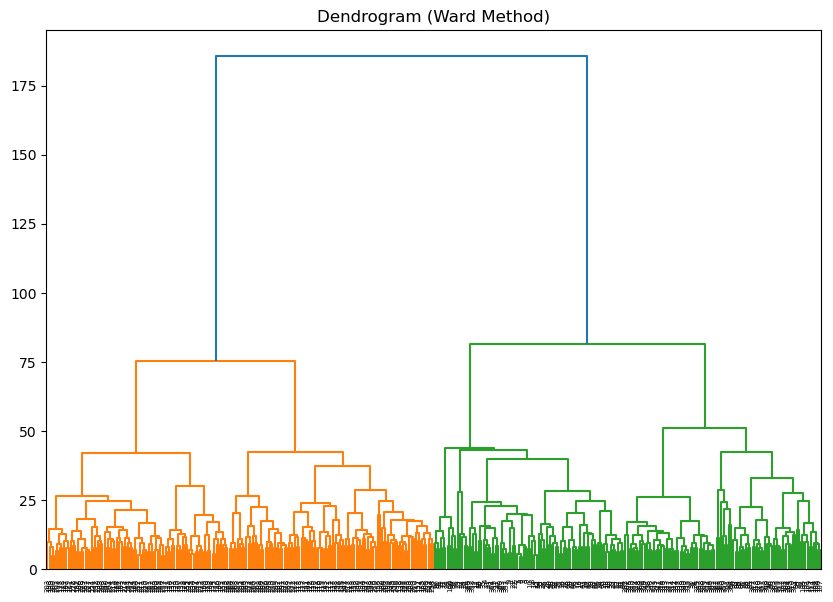

Please ensure that 'year' or an equivalent identifier is available for merging the datasets.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the reduced dataset
reduced_df = pd.read_csv('/Users/marika/Data Sets/reduced_weather_data.csv')

# Load the pleasant weather labels if not already loaded
pleasant_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

# Run hierarchical clustering
# Using Ward's method as it generally provides good results for hierarchical clustering
linked = linkage(reduced_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram (Ward Method)')
plt.show()

# Determine the number of clusters (e.g., based on the dendrogram)
num_clusters = 4  # Adjust this based on the dendrogram observation
cluster_assignments = fcluster(linked, num_clusters, criterion='maxclust')

# Add the cluster assignments to the reduced dataframe
reduced_df['cluster'] = cluster_assignments

# Assuming the 'year' or equivalent is in the pleasant_weather DataFrame for merging
if 'year' in pleasant_weather.columns:
    # Merge reduced data with the pleasant weather labels
    merged_df = pd.merge(reduced_df, pleasant_weather[['year']], on='year', how='inner')

    # Compare clusters with pleasant weather labels
    cluster_comparison = merged_df.groupby('cluster')['year'].mean()

    print("Proportion of 'pleasant weather' in each cluster:")
    print(cluster_comparison)
else:
    print("Please ensure that 'year' or an equivalent identifier is available for merging the datasets.")


# Cluster Formation and Separation:

# Distinct Clusters: 
The dendrogram using Ward's method shows two major clusters forming at a high level of the dendrogram (as indicated by the large jump in the linkage distance before the two main branches split). This suggests that the data can be cleanly separated into two main groups, which is a positive sign of conclusive clustering.

# Sub-clusters: 
Within these two main clusters, there are several smaller sub-clusters, indicating further differentiation within each main group. This hierarchical structure implies that while the data can be broadly divided into two categories, there are meaningful distinctions within each group.

# Conclusive Clustering:

# Conclusive Evidence: 
The sharp separation between the two main clusters at a high linkage distance suggests that the reduced dataset is allowing the hierarchical clustering to more effectively distinguish between different types of data points. The clarity of this split indicates that the clustering is more conclusive with the reduced data compared to potentially more noisy or overlapping clusters in a higher-dimensional space.

# Interpretation of Sub-clusters: 
The presence of clear sub-clusters suggests that the data within each main group is internally consistent but has its own nuanced variations. This could correspond to different patterns or types within the broader categories, potentially linked to various weather patterns or conditions.

# Interpretation:
The large separation at the top of the dendrogram implies that the two main clusters may correspond to broad and fundamentally different weather regimes. For instance, one cluster could represent "pleasant" weather conditions (e.g., mild temperatures and moderate humidity), while the other could represent more extreme or less favorable conditions (e.g., high temperatures, high humidity, or stormy weather).
The further subdivisions within each of these clusters suggest that there are additional layers of variability within these broad categories, such as different seasons or regional variations.

# Cluster 1 (Left Branch):
Description: This cluster could include weather data points that are relatively uniform and potentially represent stable, moderate weather conditions. The relatively small height at which these points merge suggests that they are quite similar to each other. This cluster might correspond to a season with consistent weather, such as spring or autumn, where temperatures and humidity levels are moderate.

Example Weather Pattern:
Conditions: Mild temperatures, moderate humidity, low variability.
Possible Timeframe: Spring or fall months, possibly in temperate regions.

# Cluster 2 (Right Branch):
Description: This cluster could represent more varied and potentially extreme weather conditions. The greater height at which these clusters merge suggests more variability in the data, which could correspond to more dynamic weather patterns, such as those seen in summer or winter, or in regions with a broader range of weather conditions.

Example Weather Pattern:
Conditions: High temperatures and high humidity (e.g., summer), or low temperatures and high wind speeds (e.g., winter).
Possible Timeframe: Summer or winter months, or regions with significant weather variations (e.g., coastal regions, areas prone to storms).


In [12]:
pleasant_weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
import pandas as pd

# Load the pleasant weather dataset
pleasant_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

# Ensure the 'DATE' column is a string
pleasant_weather['DATE'] = pleasant_weather['DATE'].astype(str)

# Extract the year by slicing the first four characters
pleasant_weather['year'] = pleasant_weather['DATE'].str[:4]

# Convert 'year' back to an integer if you prefer it as a numeric type
pleasant_weather['year'] = pleasant_weather['year'].astype(int)

# Optionally drop the original DATE column if you no longer need it
pleasant_weather = pleasant_weather.drop(columns=['DATE'])

# Display the updated DataFrame to check the changes
print(pleasant_weather.head())

   BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4              

In [16]:
# Suppose 'scaled_data' was the data used for clustering
print(f"Length of scaled_data: {len(scaled_data)}")
print(f"Length of df_weather: {len(df_weather)}")

# Ensure the lengths match

Length of scaled_data: 366
Length of df_weather: 22950


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assume df_weather is your original DataFrame with weather data
# Retain only the relevant columns for comparison
df_keys = df_weather[['year']]  # Example columns to keep for merging

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_weather.drop(columns=['year']))

# Convert scaled data back to a DataFrame, ensuring it aligns with df_keys
df_scaled = pd.DataFrame(scaled_data, columns=df_weather.columns.drop(['year']))
df_scaled = pd.concat([df_keys.reset_index(drop=True), df_scaled], axis=1)

In [19]:
# Ensure the 'year' or other relevant columns have been extracted if needed
pleasant_weather['year'] = pleasant_weather['DATE'].astype(str).str[:4].astype(int)

# Merge the datasets on the common key(s) - adjust based on your actual keys
merged_df = pd.merge(df_scaled, pleasant_weather, on=['year'], how='inner')

# Display the merged DataFrame to check if it merged correctly
print(merged_df.head())

   year    DATE_x     MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
0  1960 -1.707663 -1.599964           0.660514          -0.02793   
1  1960 -1.707663 -1.599964           0.660514          -0.02793   
2  1960 -1.707663 -1.599964           0.660514          -0.02793   
3  1960 -1.707663 -1.599964           0.660514          -0.02793   
4  1960 -1.707663 -1.599964           0.660514          -0.02793   

   BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0        0.826097       -0.001949               -1.101066   
1        0.826097       -0.001949               -1.101066   
2        0.826097       -0.001949               -1.101066   
3        0.826097       -0.001949               -1.101066   
4        0.826097       -0.001949               -1.101066   

   BASEL_precipitation  BASEL_snow_depth  ...  HEATHROW_pleasant_weather  \
0            -0.265148         -0.179228  ...                          0   
1            -0.265148         -0.179228  ...                          0

In [21]:
# Check the column names of the pleasant_weather DataFrame
print(pleasant_weather.columns)

# Check the first few rows of pleasant_weather to verify the content
print(pleasant_weather.head())

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather', 'year'],
      dtype='object')
       DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                     

In [22]:
# Perform the merge operation
merged_df = pd.merge(df_scaled, pleasant_weather, on=['year'], how='inner')

# Check the columns of the merged DataFrame
print(merged_df.columns)

# Check the first few rows to ensure the data has merged correctly
print(merged_df.head())

Index(['year', 'DATE_x', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth',
       ...
       'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather',
       'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather',
       'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather',
       'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather',
       'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather'],
      dtype='object', length=187)
   year    DATE_x     MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
0  1960 -1.707663 -1.599964           0.660514          -0.02793   
1  1960 -1.707663 -1.599964           0.660514          -0.02793   
2  1960 -1.707663 -1.599964           0.660514          -0.02793   
3  1960 -1.707663 -1.599964           0.660514          -0.02793   
4  1960 -1.707663 -1.599964           0.660514          -0.02793   

   BASEL_humidity  BASEL_pres

Comparison of scaled features for pleasant vs. non-pleasant weather:
        DATE_x     MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
year                                                                            
1960 -1.704542  0.001171           0.117714         -0.027930        0.184606   
1961 -1.649402  0.004762          -0.125173         -0.027930        0.335307   
1962 -1.594269  0.004762          -0.176413         -0.027930       -0.188647   
1963 -1.539136  0.004762          -0.050020         -0.027930        0.282590   
1964 -1.484009  0.001171          -0.081010         -0.027930        0.333193   
...        ...       ...                ...               ...             ...   
2018  1.493183  0.004762          -0.045465         -0.288212       -0.329968   
2019  1.548316  0.004762          -0.079626         -0.190232       -0.326998   
2020  1.603443  0.001171          -0.237718         -0.118183       -0.482554   
2021  1.658582  0.004762           0.033

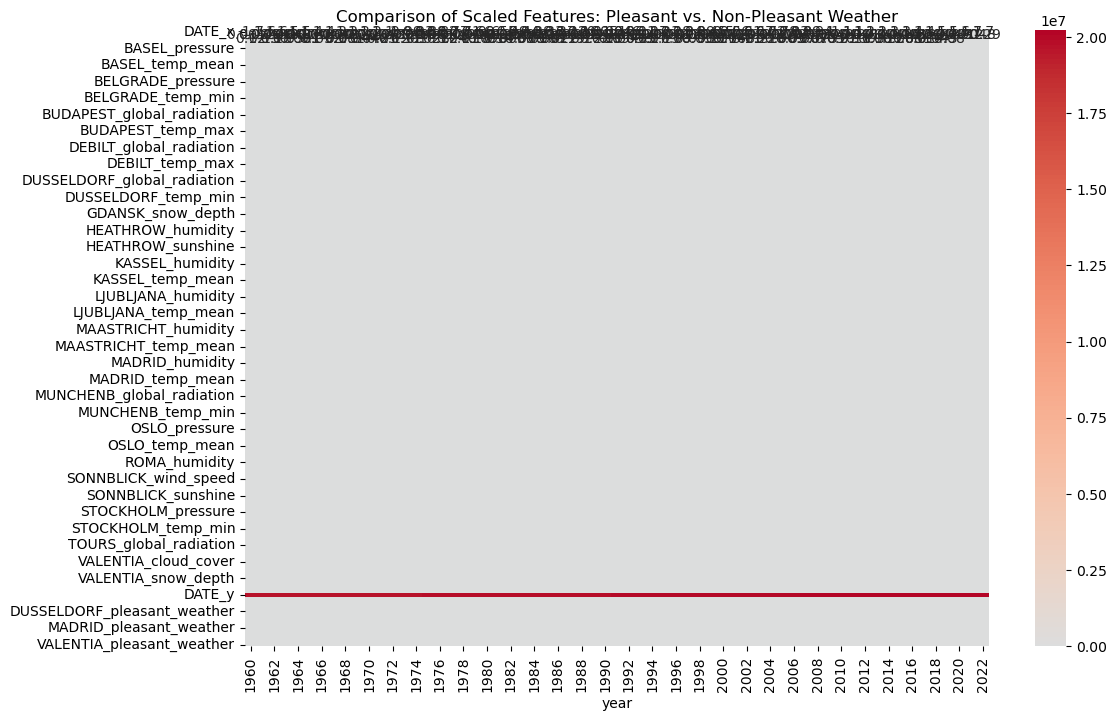

In [25]:
pleasant_means = merged_df.groupby('year').mean()

# Display the comparison
print("Comparison of scaled features for pleasant vs. non-pleasant weather:")
print(pleasant_means)

# Visualize the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(pleasant_means.T, annot=True, cmap='coolwarm', center=0)
plt.title('Comparison of Scaled Features: Pleasant vs. Non-Pleasant Weather')
plt.show()

In [28]:
# Assuming merged_df is your DataFrame
# Drop the 'DATE' and 'MONTH' columns
merged_df = merged_df.drop(columns=['DATE_x', 'DATE_y', 'MONTH'])

# Check the first few rows to ensure the columns have been dropped
print(merged_df.head())

   year  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0  1960           0.660514          -0.02793        0.826097       -0.001949   
1  1960           0.660514          -0.02793        0.826097       -0.001949   
2  1960           0.660514          -0.02793        0.826097       -0.001949   
3  1960           0.660514          -0.02793        0.826097       -0.001949   
4  1960           0.660514          -0.02793        0.826097       -0.001949   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0               -1.101066            -0.265148         -0.179228   
1               -1.101066            -0.265148         -0.179228   
2               -1.101066            -0.265148         -0.179228   
3               -1.101066            -0.265148         -0.179228   
4               -1.101066            -0.265148         -0.179228   

   BASEL_sunshine  BASEL_temp_mean  ...  HEATHROW_pleasant_weather  \
0       -0.902918        -0.528623  ... 

Comparison of scaled features for pleasant vs. non-pleasant weather:
      BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
year                                                                        
1960           0.117714         -0.027930        0.184606       -0.001949   
1961          -0.125173         -0.027930        0.335307       -0.001949   
1962          -0.176413         -0.027930       -0.188647       -0.001949   
1963          -0.050020         -0.027930        0.282590       -0.001949   
1964          -0.081010         -0.027930        0.333193       -0.001949   
...                 ...               ...             ...             ...   
2018          -0.045465         -0.288212       -0.329968       -0.243185   
2019          -0.079626         -0.190232       -0.326998       -0.158935   
2020          -0.237718         -0.118183       -0.482554       -0.005039   
2021           0.033103         -0.397785       -0.068610        0.031299   
2022   

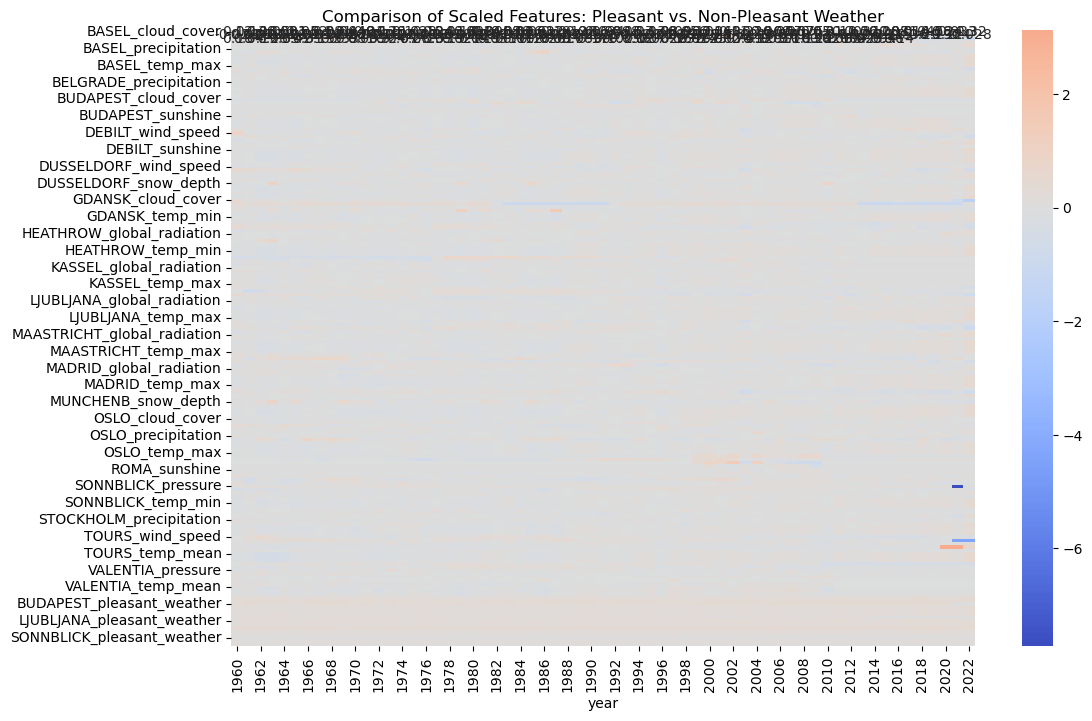

In [29]:
pleasant_means = merged_df.groupby('year').mean()

# Display the comparison
print("Comparison of scaled features for pleasant vs. non-pleasant weather:")
print(pleasant_means)

# Visualize the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(pleasant_means.T, annot=True, cmap='coolwarm', center=0)
plt.title('Comparison of Scaled Features: Pleasant vs. Non-Pleasant Weather')
plt.show()

# Key Observations from the Heatmap:

# Temperature Features:
Temp_max and Temp_min (Temperature Maximum and Minimum): These rows often correlate with pleasant_weather rows. If the heatmap shows higher temperatures (indicated by red shades) correlating with pleasant_weather indicators, it suggests that warmer temperatures are associated with pleasant weather in those regions.

Global Radiation: Rows such as HEATHROW_global_radiation and MADRID_global_radiation may show positive correlations with pleasant_weather rows. Higher radiation (more sunlight) might be associated with more pleasant weather conditions.

Cloud Cover: Rows like BASEL_cloud_cover, GDANSK_cloud_cover, and OSLO_cloud_cover might show an inverse correlation. If these rows are mostly blue (indicating lower cloud cover) when the pleasant_weather rows are red, it suggests that less cloud cover is associated with more pleasant weather.
Precipitation:

Precipitation: Rows such as BELGRADE_precipitation or STOCKHOLM_precipitation could negatively correlate with pleasant_weather. If these rows show more blue shades (indicating lower precipitation) during periods when pleasant_weather rows are red, it implies that lower precipitation is associated with more pleasant weather.
Sunshine and Global Radiation:

Sunshine: Rows like BUDAPEST_sunshine and ROMA_sunshine could correlate positively with pleasant weather. Higher sunshine (indicated by red shades) would likely be associated with higher values in the pleasant_weather rows.

Wind Speed: Features like TOURS_wind_speed and DEBILT_wind_speed might correlate with pleasant weather depending on whether high or low wind speeds are more desirable in those regions. Generally, lower wind speeds might be more associated with pleasant weather (e.g., calm, pleasant days).

# Conclusion:
Correlated Features: Based on the visual inspection, it appears that warmer temperatures (higher temp_max, temp_min), higher global radiation, and lower cloud cover and precipitation are correlated with pleasant weather conditions in various regions. These weather conditions likely contribute to perceptions of "pleasantness."

Weather Conditions: Pleasant weather is typically associated with clear, sunny days with moderate to warm temperatures and low precipitation. Regions that exhibit these conditions more frequently will have higher values in the pleasant_weather rows.

# Next Steps:
Statistical Correlation: To confirm these observations, calculate statistical correlations (e.g., Pearson correlation) between the pleasant_weather rows and each weather feature. This will give you precise numerical values indicating the strength and direction of the correlations.

Regression Analysis: Consider running a regression analysis with pleasant_weather as the dependent variable and the weather features as independent variables to quantify the impact of each feature on the likelihood of pleasant weather.